 ## README
 ### Supervised machine learning for the assessment of Chronic Kidney Disease advancement 
 In this notebook an overview of the datased used for the study is provided. Together with it, we provide an example of the proposed computational model (an ExtraTreesClassifier) trained and tested for the different classification problems defiend in the study:
 - predicting dialysis within 1 year or after (binary classification)
 - predicting dialysis within the first 6 months, between 6 and 18 months, or after 18 months (3 classes)
 - predicting the occurrence of renal failure within the first 6months, between 6 and 14 months, between 14 and 24 months, or more than 24 months (4 classes)
 
 For brevity, in this Notebook the comparison of all the evaluated algorithms is omitted but the readers are welcome to try and compare different computational models (Decision Trees, Random Forest, Neural Networks, etc.) over different approaches (classification or regression) and different subsets of features. The details and results of the different approaches and models that have been compared in the study can be found in the original manuscript.
 

In [1]:
import pandas as pd

In [2]:
PATH_TRAIN = "./training.csv"
PATH_TEST = "./test.csv"

In [3]:
#load training
training = pd.read_csv(PATH_TRAIN)
training.shape

(3199, 59)

In [4]:
#training overview
training.head()

,last GFR,age,months until dialysis,diabetic,diabetic family,cardiopathic,cardiopathic family,hypertension episodes,Hypertension episodes family,anemic,...,hemoglobin,hemoglobin delta,leukocytes average,specific gravity standard deviation,GFR standard deviation last 4 months,GFR standard deviation last year,transplanted,male,GFR delta last 4 months,GFR delta last year
0,20.276592,78,1,0,0,0,0,1,0,1,...,11.4,-3.652381,38.715882,0.001327,1.941938,5.525198,0,0,-3.126396,13.813144
1,30.840751,69,1,0,0,1,0,1,0,0,...,12.2,-1.085714,79.450000,0.002055,3.808660,5.525198,0,1,-4.235526,3.248984
2,16.648019,69,1,0,0,0,0,1,0,0,...,12.4,-0.530769,7.478462,0.001090,0.398267,2.871713,0,1,1.223860,5.238569
3,28.275169,78,6,0,0,0,0,1,0,0,...,10.1,0.000000,87.670000,0.000943,7.043018,1.787367,1,1,-7.695249,-3.675169
4,21.670000,64,19,0,0,0,0,1,0,1,...,11.8,-0.368750,22.865000,0.001110,10.103413,11.871167,1,0,15.610855,14.912619


In [5]:
#load test
test = pd.read_csv(PATH_TEST)
test.shape

(1067, 59)

In [6]:
#test overview
test.head()

,last GFR,age,months until dialysis,diabetic,diabetic family,cardiopathic,cardiopathic family,hypertension episodes,Hypertension episodes family,anemic,...,hemoglobin,hemoglobin delta,leukocytes average,specific gravity standard deviation,GFR standard deviation last 4 months,GFR standard deviation last year,transplanted,male,GFR delta last 4 months,GFR delta last year
0,17.855162,80,7,1,0,1,0,1,0,0,...,10.4,0.172727,9.666364,0.001633,0.000000,6.718452,0,0,4.071103,17.062928
1,28.154962,75,7,0,0,0,1,1,1,0,...,12.2,0.180000,8.266000,0.000000,4.222687,5.525198,0,0,-2.175169,5.934773
2,25.560000,60,63,0,0,0,0,1,0,1,...,11.3,-0.342857,13.890000,0.001309,11.935143,11.254483,1,0,15.800630,10.931382
3,17.777442,77,0,0,0,1,0,1,0,1,...,10.1,0.050000,14.450000,0.001345,3.808660,5.525198,0,1,8.827783,16.312293
4,23.180000,26,27,0,0,0,0,1,0,0,...,13.8,0.600000,28.136667,0.000000,4.946360,8.260643,0,1,-0.253640,16.530643


In [7]:
#define the selected 27 features
SELECTED_27_FEATURES = ["age", "anemic", "aspartate aminotransferase", "cardiopathic", "chlorine",
                        "creatinine", "creatinine delta","diabetic", "erythrocytes", "erythrocytes delta", 
                        "GFR delta last 4 months", "GFR delta last year", "GFR standard deviation last 4 months",
                        "GFR standard deviation last year", "hematocrit", "hemoglobin", "hypertension episodes",
                        "last GFR", "male", "mean corpuscular hemoglobin", "mean corpuscular volume", "potassium",
                        "sodium", "specific gravity standard deviation", "urate", "urea", "urea delta"]

In [8]:
training[SELECTED_27_FEATURES].shape

(3199, 27)

In [9]:
test[SELECTED_27_FEATURES].shape

(1067, 27)

### Train and test ExtraTreesClassifier for different number of classes (2,3 and 4)

In [10]:
#import needed libraries
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


#### Define some useful functions:

In [11]:
def compute_precision(y_true, y_pred):

    macro_precision = precision_score(y_true, y_pred, average='macro')  

    micro_precision = precision_score(y_true, y_pred, average='micro')  

    weighted_precision = precision_score(y_true, y_pred, average='weighted')

    print(" macro precision: " + str(macro_precision))
    print(" micro precision: " + str(micro_precision))
    print(" weighted precision: " + str(weighted_precision))

    return

In [12]:
def compute_recall(y_true, y_pred):

    macro_recall = recall_score(y_true, y_pred, average='macro')  

    micro_recall = recall_score(y_true, y_pred, average='micro')  

    weighted_recall = recall_score(y_true, y_pred, average='weighted')

    print(" macro recall: " + str(macro_recall))
    print(" micro recall: " + str(micro_recall))
    print(" weighted recall: " + str(weighted_recall))

    return

In [13]:
def compute_f1_score(y_true, y_pred):

    macro_f1_score = f1_score(y_true, y_pred, average='macro')  

    micro_f1_score = f1_score(y_true, y_pred, average='micro')  

    weighted_f1_score = f1_score(y_true, y_pred, average='weighted')

    print(" macro f1_score: " + str(macro_f1_score))
    print(" micro f1_score: " + str(micro_f1_score))
    print(" weighted f1_score: " + str(weighted_f1_score))

    return

In [14]:
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False, title=None,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.asarray(classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Binary classification - predicting dialysis within 1 year

In [15]:
#define the corresponding class depending on the variable "months until dialysis"
# 1st class if "months until dialysis" < 12,
# 2nd class otherwise
training['class'] = training.apply(lambda x : (1 if x["months until dialysis"] < 12   else  2),axis=1)

In [16]:
#compute the corresponding classes also for the test set
test['class'] = test.apply(lambda x : (1 if x["months until dialysis"] < 12   else  2),axis=1)

In [17]:
#train only on the 27 selected features
Xtrain = training[SELECTED_27_FEATURES]
print("Train features shape: " + str(Xtrain.shape))
Ytrain = training['class']

Train features shape: (3199, 27)


In [18]:
Xtest = test[SELECTED_27_FEATURES]
print("Test features shape: " + str(Xtest.shape))
Ytest = test['class']

Test features shape: (1067, 27)


In [19]:
#define an Etratrees classifier with a given number of estimators (i.e. 180). 
#The number of estimators is an hyperparameter and can be tuned with crossvalidation on the training set
clf_binary = ExtraTreesClassifier(n_estimators=180)

In [20]:
#train the classifier
clf_binary.fit(Xtrain,Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=180,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [21]:
# Make predictions for the test using the trained classifier
y_pred_test = clf_binary.predict(Xtest)

In [22]:
#compute accuracy over the test
test_accuracy = accuracy_score(Ytest,y_pred_test)
print(test_accuracy)

0.9343955014058107


In [23]:
#compute precision over the test
compute_precision(Ytest,y_pred_test)
print()
#compute recall over the test
compute_recall(Ytest,y_pred_test)
print()
#compute F1 over the test
compute_f1_score(Ytest,y_pred_test)

 macro precision: 0.9341191662054971
 micro precision: 0.9343955014058107
 weighted precision: 0.9343622937422537

 macro recall: 0.9292635234718148
 micro recall: 0.9343955014058107
 weighted recall: 0.9343955014058107

 macro f1_score: 0.9315102409108249
 micro f1_score: 0.9343955014058107
 weighted f1_score: 0.9342110555294189


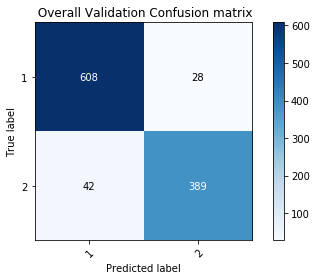

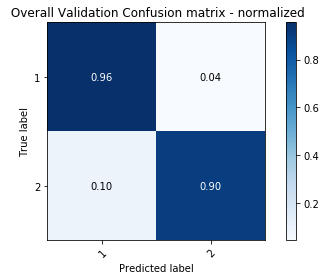

In [24]:
#compute Confusion Matrix
np.set_printoptions(precision=2)
plot_confusion_matrix(Ytest, y_pred_test, classes=[1,2],title=' Overall Validation Confusion matrix')
#compute Confusion Matrix normalized        
plot_confusion_matrix(Ytest, y_pred_test, classes=[1,2], normalize = True,title= ' Overall Validation Confusion matrix - normalized')

## 3 Classes classification

In [26]:
#define the corresponding class depending on the variable "months until dialysis"
# 1st class if "months until dialysis" < 6,
# 2nd class if 6 <= "months until dialysis" < 18
# 3rd class otherwise
def get_class_for_3_classes_classification(months_until_dialysis):
    if months_until_dialysis < 6:
        return 1
    if (6 <= months_until_dialysis) and (months_until_dialysis < 18):
        return 2
    else:
        return 3

In [27]:
training['class'] = training.apply(lambda x : get_class_for_3_classes_classification( x["months until dialysis"]),axis=1)

In [28]:
#compute the corresponding classes also for the test set
test['class'] = test.apply(lambda x : get_class_for_3_classes_classification( x["months until dialysis"]),axis=1)

In [29]:
#train only on the 27 selected features
Xtrain = training[SELECTED_27_FEATURES]
print("Train features shape: " + str(Xtrain.shape))
Ytrain = training['class']

Train features shape: (3199, 27)


In [30]:
Xtest = test[SELECTED_27_FEATURES]
Xtest.shape

(1067, 27)

In [31]:
#define an Etratrees classifier with a given number of estimators (i.e. 180). 
#The number of estimators is an hyperparameter and can be tuned with crossvalidation on the training set
clf_3Classes = ExtraTreesClassifier(n_estimators=180)

In [33]:
#train the classifier
clf_3Classes.fit(Xtrain,Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=180,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [34]:
# Make predictions on test
y_pred_test = clf_3Classes.predict(Xtest)

In [35]:
#compute accuracy
test_accuracy = accuracy_score(Ytest,y_pred_test)
print(test_accuracy)

0.8837863167760075


In [36]:
#compute precision
compute_precision(Ytest,y_pred_test)
print()
#compute recall
compute_recall(Ytest,y_pred_test)
print()
#compute F1
compute_f1_score(Ytest,y_pred_test)

 macro precision: 0.8853482534570594
 micro precision: 0.8837863167760075
 weighted precision: 0.8838252311097146

 macro recall: 0.8786246414799583
 micro recall: 0.8837863167760075
 weighted recall: 0.8837863167760075

 macro f1_score: 0.8814759596009596
 micro f1_score: 0.8837863167760075
 weighted f1_score: 0.8832673358944446


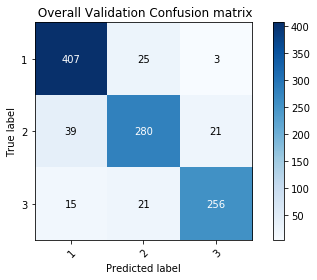

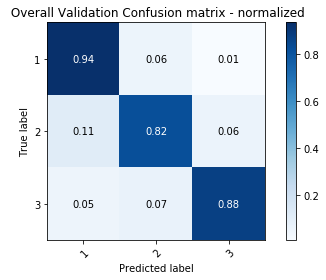

In [37]:
# plot confusion matrix
np.set_printoptions(precision=2)
plot_confusion_matrix(Ytest, y_pred_test, classes=[1,2,3],title=' Overall Validation Confusion matrix')
# plot confusion normalized        
plot_confusion_matrix(Ytest, y_pred_test, classes=[1,2,3], normalize = True,title= ' Overall Validation Confusion matrix - normalized')

## 4 Classes classification

In [38]:
#define the corresponding class depending on the variable "months until dialysis"
# 1st class if "months until dialysis" < 6,
# 2nd class if 6 <= "months until dialysis" < 14
# 3rd class if 14 <= "months until dialysis" < 24
# 4th class otherwise
def get_class_for_4_classes_classification(months_until_dialysis):
    if months_until_dialysis < 6:
        return 1
    if (6 <= months_until_dialysis) and (months_until_dialysis < 14):
        return 2
    if (14 <= months_until_dialysis) and (months_until_dialysis < 24):
        return 3
    else:
        return 4

In [39]:
training['class'] = training.apply(lambda x : get_class_for_4_classes_classification( x["months until dialysis"]),axis=1)

In [40]:
#compute the corresponding classes also for the test set
test['class'] = test.apply(lambda x : get_class_for_4_classes_classification( x["months until dialysis"]),axis=1)

In [41]:
#train only on the 27 selected features
Xtrain = training[SELECTED_27_FEATURES]
print("Train features shape: " + str(Xtrain.shape))
Ytrain = training['class']

Train features shape: (3199, 27)


In [42]:
Xtest = test[SELECTED_27_FEATURES]
Xtest.shape

(1067, 27)

In [44]:
#define an Etratrees classifier with a given number of estimators (i.e. 180). 
#The number of estimators is an hyperparameter and can be tuned with crossvalidation on the training set
clf_4Classes = ExtraTreesClassifier(n_estimators=180)
#train the classifier
clf_4Classes.fit(Xtrain,Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=180,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [45]:
# Make predictions on test
y_pred_test = clf_4Classes.predict(Xtest)

In [46]:
#compute accuracy
test_accuracy = accuracy_score(Ytest,y_pred_test)
print(test_accuracy)

0.8650421743205249


In [47]:
#compute precision 
compute_precision(Ytest,y_pred_test)
print()
#compute recall
compute_recall(Ytest,y_pred_test)
print()
#compute F1
compute_f1_score(Ytest,y_pred_test)

 macro precision: 0.8596042559703528
 micro precision: 0.8650421743205249
 weighted precision: 0.8640904451024815

 macro recall: 0.8390553964391135
 micro recall: 0.8650421743205249
 weighted recall: 0.8650421743205249

 macro f1_score: 0.8482253753103071
 micro f1_score: 0.8650421743205249
 weighted f1_score: 0.8634758863790077


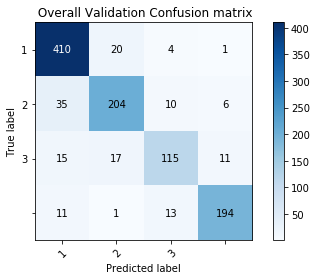

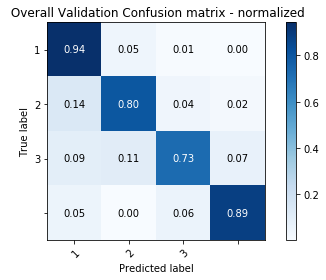

In [48]:
#plot confusion matrix
np.set_printoptions(precision=2)
plot_confusion_matrix(Ytest, y_pred_test, classes=[1,2,3],title=' Overall Validation Confusion matrix')
#plot confusion matrix normalized        
plot_confusion_matrix(Ytest, y_pred_test, classes=[1,2,3], normalize = True,title= ' Overall Validation Confusion matrix - normalized')